# Problem Statement-
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

In [1452]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the train data

In [1453]:
#Read csv file and convert into Dataframe
data_train=pd.read_excel(r'D:\DataTrained\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Observation-

The features in the above data set are-

- Airline     

- Date_of_Journey    

- Source 

- Destination 

- Route 

- Dep Time

- Arrival_Time

- Duration

- Total stops

- Additional info

The label in the given dataset is-

- Price

In [1454]:
#shape of file
data_train.shape

(10683, 11)

In [1455]:
# Checking for data types of the columns
data_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [1456]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1457]:
# Checking for null values in object datatype columns

for column in data_train:
    data_train[column]=data_train[column].replace(" ",np.nan)

In [1458]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1459]:
#As it is for one row lets drop the null value row
data_train=data_train.dropna()

In [1460]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [1461]:
#shape of file
data_train.shape

(10682, 11)

# Visualization of the Data and Encoding object data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


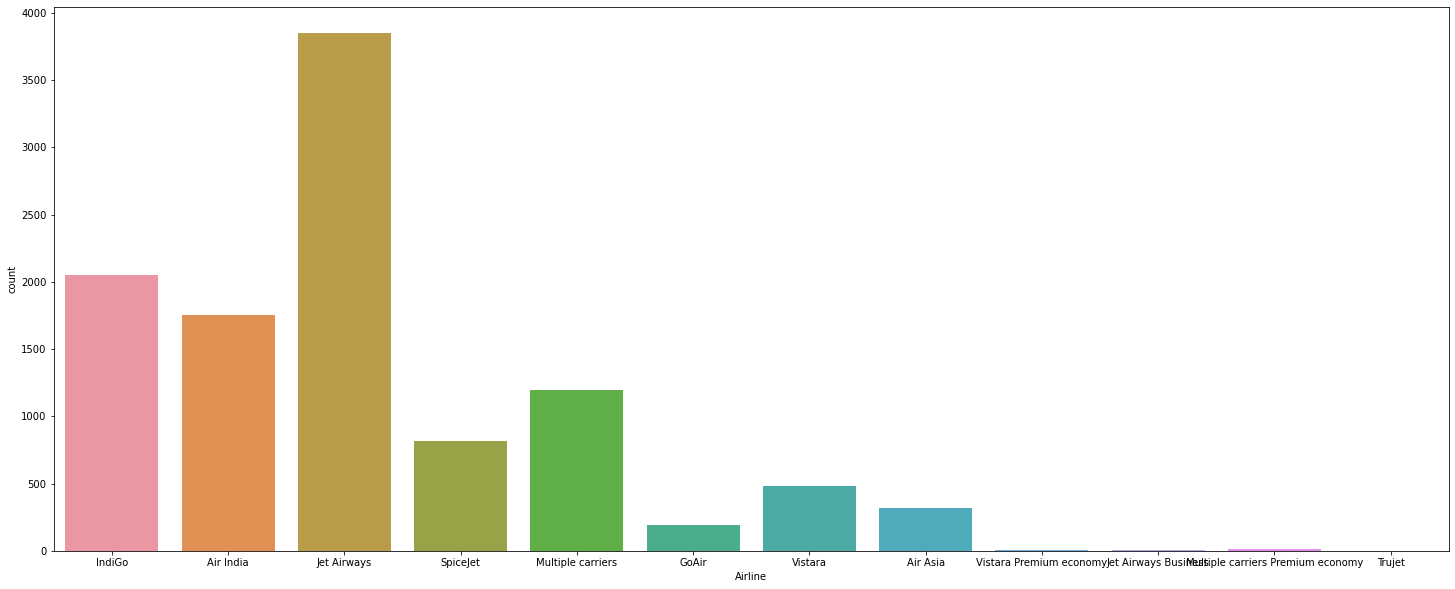

In [1462]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Airline", data=data_train)
print(data_train["Airline"].value_counts())

# 
3849 are Jet Airways flights, 2053 are Indigo flights, 1751 are Air India flights, 1196 are Multple carriers, 818 are spice jet flights, 479 are vistara flights, 319 are Ais Asia flights, 194 are GoAir flights, 13 are Multiple carriers Premium economy, 6 are Jet Airways Business, 3 are Vistara Premium Economy, 1 are Trujet flight   

In [1463]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Airline"])
data_train["Airline"]=df

# 
The data is encoded as follows-

- 0 - Air Asia
- 1 - Air India
- 2 - GoAir
- 3 - IndiGo
- 4 - Jet Airways 
- 5 - Jet Airways Business
- 6 - Multiple carriers
- 7 - Multiple carriers Premium economy
- 8 - SpiceJet
- 9 - Trujet
- 10- Vistara 
- 11- Vistara Premium economy

In [1464]:
data_train['Date_of_Journey']=pd.to_datetime(data_train['Date_of_Journey'], dayfirst=True)

In [1465]:
#Storing date and month in separate column
#As the year is 2019, it need not be stored
data_train['Date']=data_train['Date_of_Journey'].dt.day
data_train['Month']=data_train['Date_of_Journey'].dt.month

In [1466]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,1,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,4,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,10,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [1467]:
#As the date of journey is stored in date and month columns, date of journey is deleted
data_train=data_train.drop(columns=["Date_of_Journey"])

<AxesSubplot:ylabel='Frequency'>

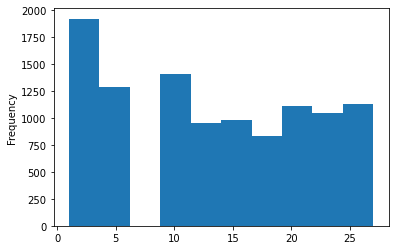

In [1468]:
data_train.Date.plot(kind='hist')

# 
The maximum flights are operated in the 1st week of the month

5    3465
6    3414
3    2724
4    1079
Name: Month, dtype: int64


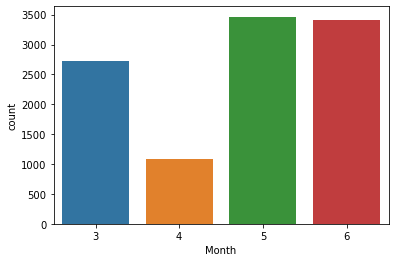

In [1469]:
ax=sns.countplot(x="Month", data=data_train)
print(data_train["Month"].value_counts())

# 
The maximum flights are operated in the month of May and June

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


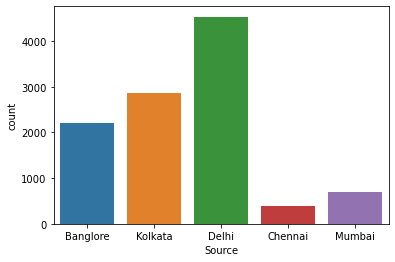

In [1470]:
ax=sns.countplot(x="Source", data=data_train)
print(data_train["Source"].value_counts())

# 
4536 flights fly from Delhi, 2871 flights fly from Kolkata, 2197 flights from Banglore, 697 flights fly from Mumbai and 381 flights fly from Chennai

In [1471]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Source"])
data_train["Source"]=df

# 
The data is encoded as follows-

- 0 - Banglore
- 1 - Chennai
- 2 - Delhi
- 3 - Kolkata
- 4 - Mumbai

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


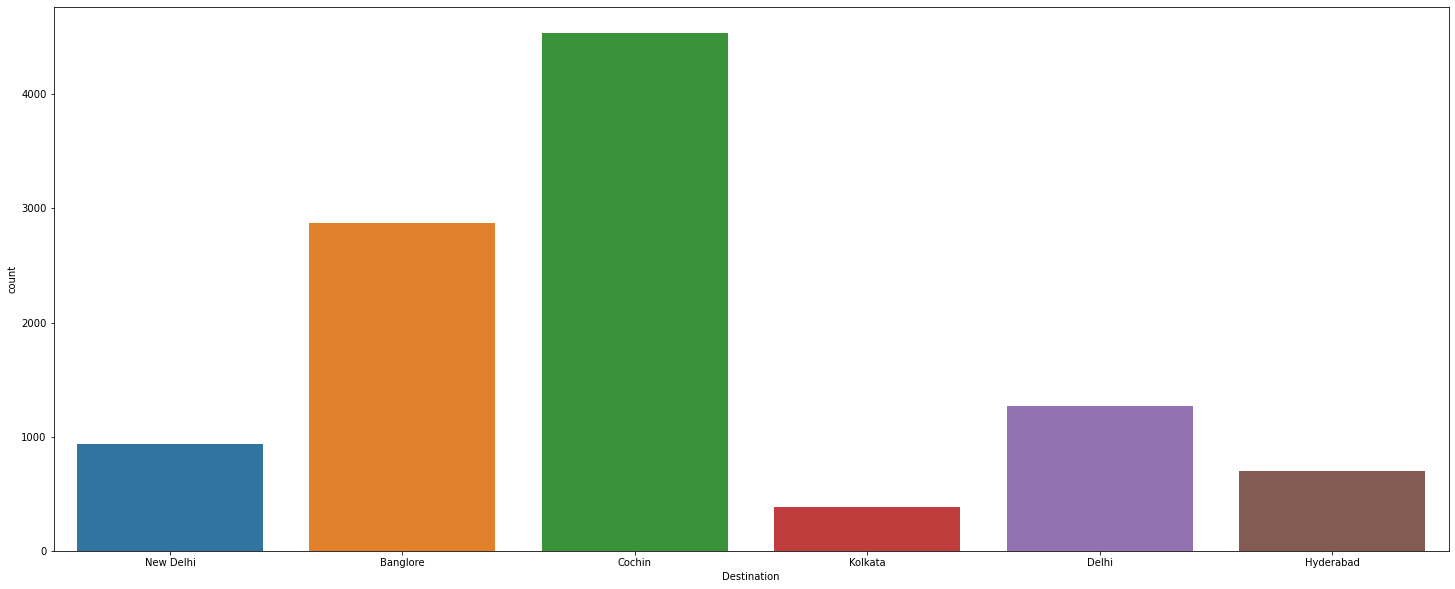

In [1472]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Destination", data=data_train)
print(data_train["Destination"].value_counts())

# 
4536 flights are flying to Cochin, 2871 flights are flying to Banglore, 1265 flights are flying to Delhi, 932 flights fly to New Delhi, 697 flights fly to Hyderabad, 381 flights fly to Kolkata   

As Delhi and New Delhi are the same location, their data will be combined (1265+932), 2197 flights arrive at Delhi

In [1473]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Destination"])
data_train["Destination"]=df


The data is encoded as follows-

- 0 - Banglore
- 1 - Cochin
- 2 - Delhi
- 3 - Hyderabad
- 4 - Kolkata
- 5 - New Delhi

In [1474]:
#Replace the values of destination, so that source and destination have different numbers
data_train["Destination"]=data_train["Destination"].replace(0,10)
data_train["Destination"]=data_train["Destination"].replace(1,11)
data_train["Destination"]=data_train["Destination"].replace(2,12)
data_train["Destination"]=data_train["Destination"].replace(3,13)
data_train["Destination"]=data_train["Destination"].replace(4,14)
data_train["Destination"]=data_train["Destination"].replace(5,12)

# 
The data is now encoded as follows-

- 10 - Banglore
- 11 - Cochin
- 12 - Delhi
- 13 - Hyderabad
- 14 - Kolkata

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


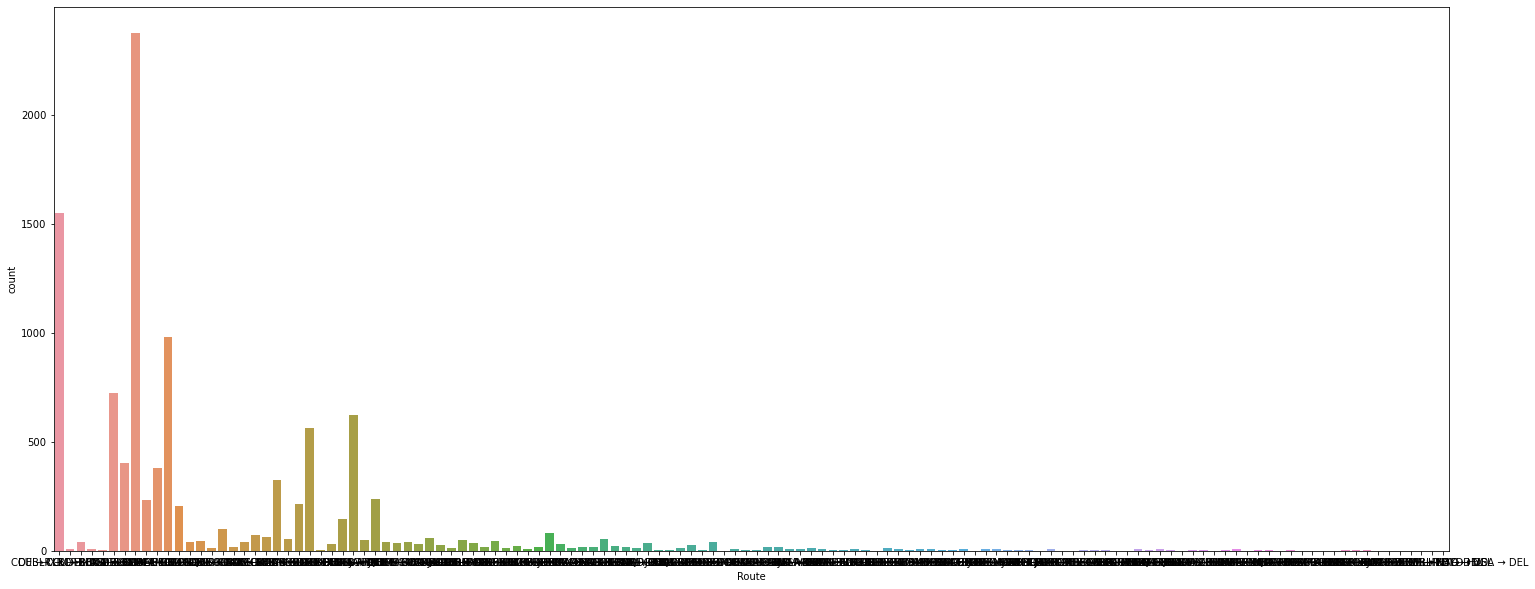

In [1475]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Route", data=data_train)
print(data_train["Route"].value_counts())

# 
Maximum flights pass through Mumbai (BOM)

In [1476]:
#Encoding the features using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

data_train["Route"]=enc.fit_transform(data_train["Route"].values.reshape(-1,1))

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64


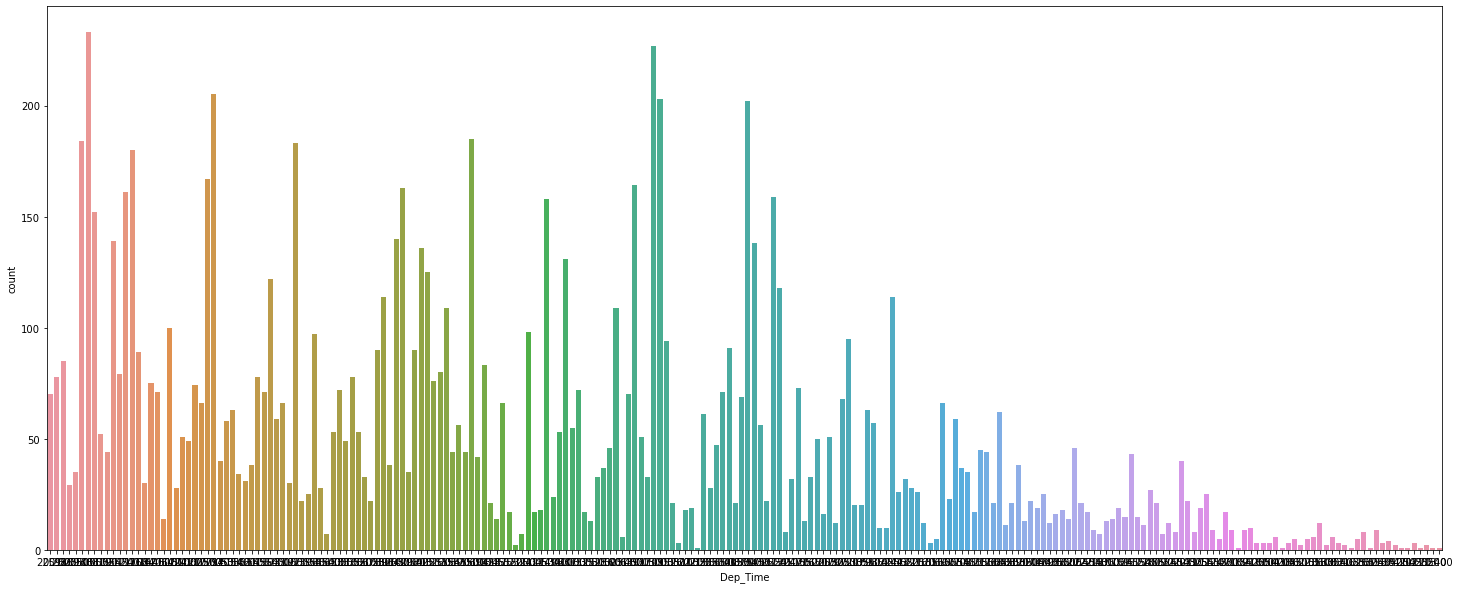

In [1477]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Dep_Time", data=data_train)
print(data_train["Dep_Time"].value_counts())

# 
Majority of the flights depart in the evening between 17:00 and 19:00

In [1478]:
#Converting time to continous number
d=data_train["Dep_Time"]

In [1479]:
dd=[]
for i in d:
    dd.append(i[0:2]+i[3:5])

In [1480]:
data_train["Dep_Time"]=dd

In [1481]:
data_train["Dep_Time"]=data_train["Dep_Time"].astype(int)

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64


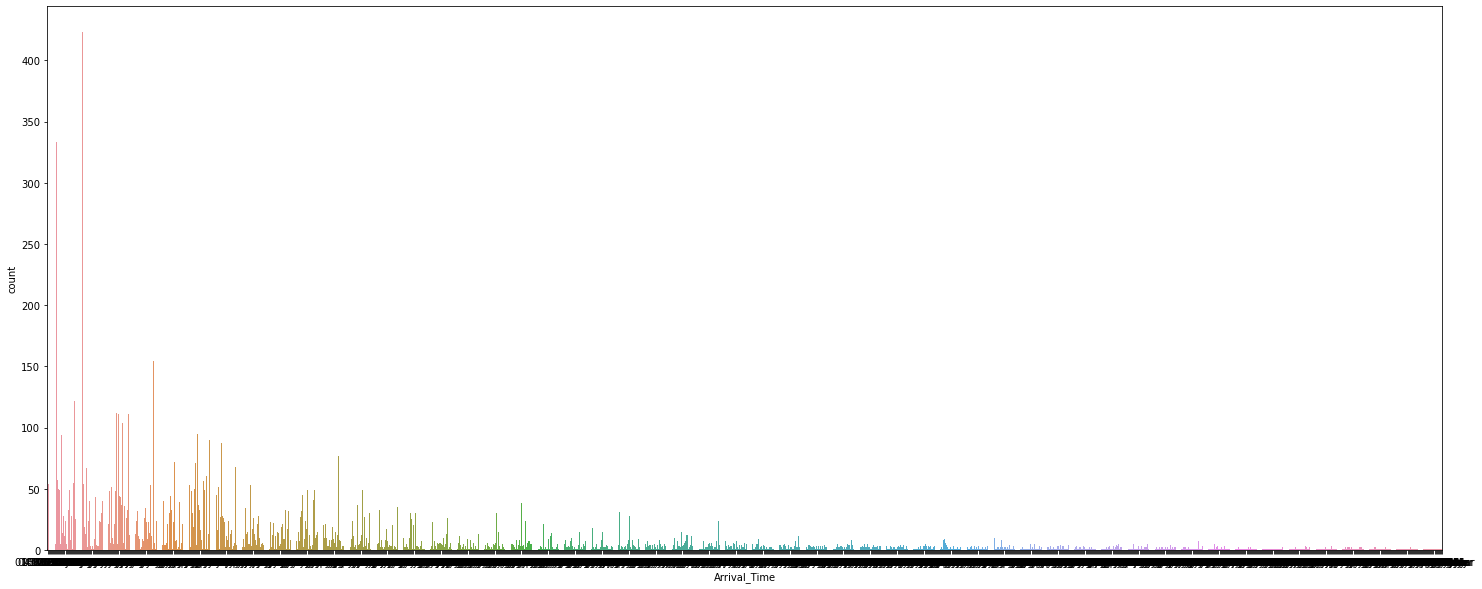

In [1482]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Arrival_Time", data=data_train)
print(data_train["Arrival_Time"].value_counts())

# 
Majority of the flights arrive at night between 19:00 and 21:00

In [1483]:
#Converting time to continous number
da=data_train["Arrival_Time"]

In [1484]:
d=[]
for i in da:
    d.append(i[0:2]+i[3:5])

In [1485]:
data_train["Arrival_Time"]=d

In [1486]:
data_train["Arrival_Time"]=data_train["Arrival_Time"].astype(int)

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


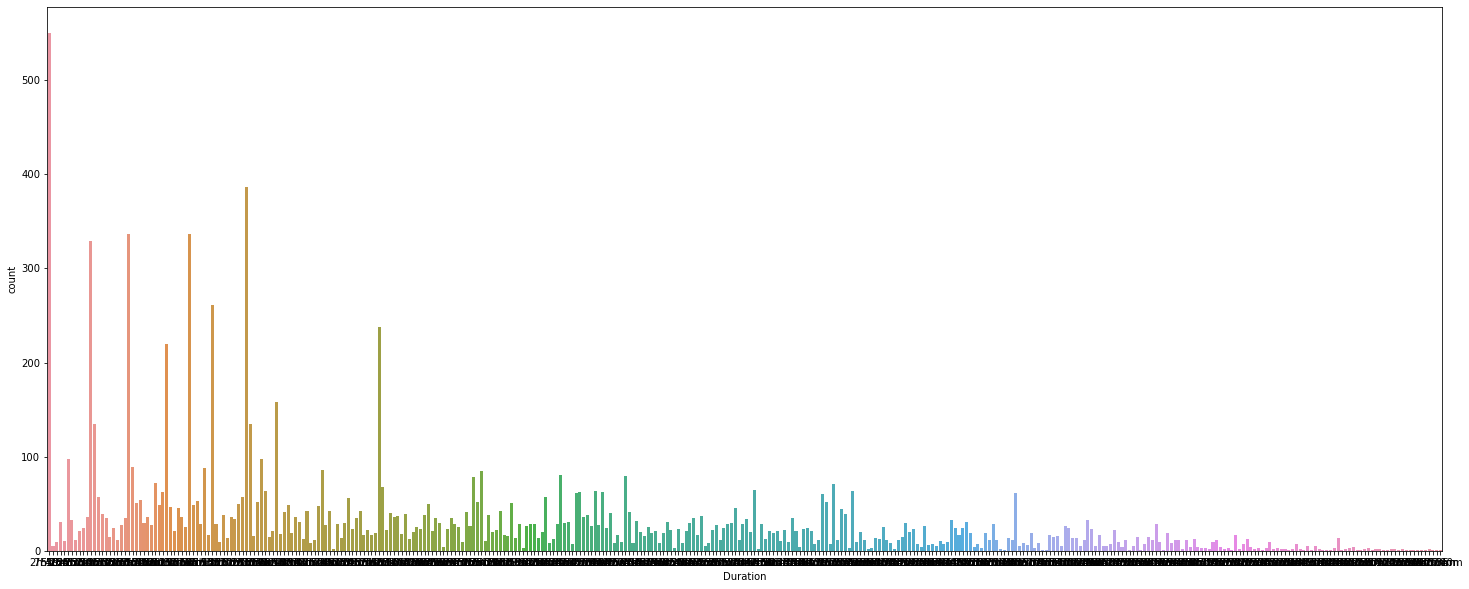

In [1487]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Duration", data=data_train)
print(data_train["Duration"].value_counts())

# 
The flight duration of majority flights are of 2-3 hours

In [1488]:
#Converting time to continous number
dur=data_train["Duration"]

In [1489]:
dt_h=[]
dt_m=[]
for i in dur:
    b=""
    c=""
    x=0
    y=0
    for a in range(0,len(i)):
        if i[a]=='h':
            x=a
            b=i[0:x]
            dt_h.append(b)
    for a in range(0,len(i)):       
        if i[a]=='m':
            y=a
            if x>0:
                c=i[x+2:y] 
            else:
                c=i[0:y]
            dt_m.append(c)
    if b=="":
        dt_h.append('0')
    if c=="":
        dt_m.append('0')   

In [1490]:
#converting duration into minutes
dh=[]
a=0
for i in dt_h:
    l=int(i)
    if dt_m[a]=='':
        j=0
    else:
        j=int(dt_m[a])
    k=(l*60)+j
    dh.append(k)
    a=a+1

In [1491]:
data_train["Duration"]=dh

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


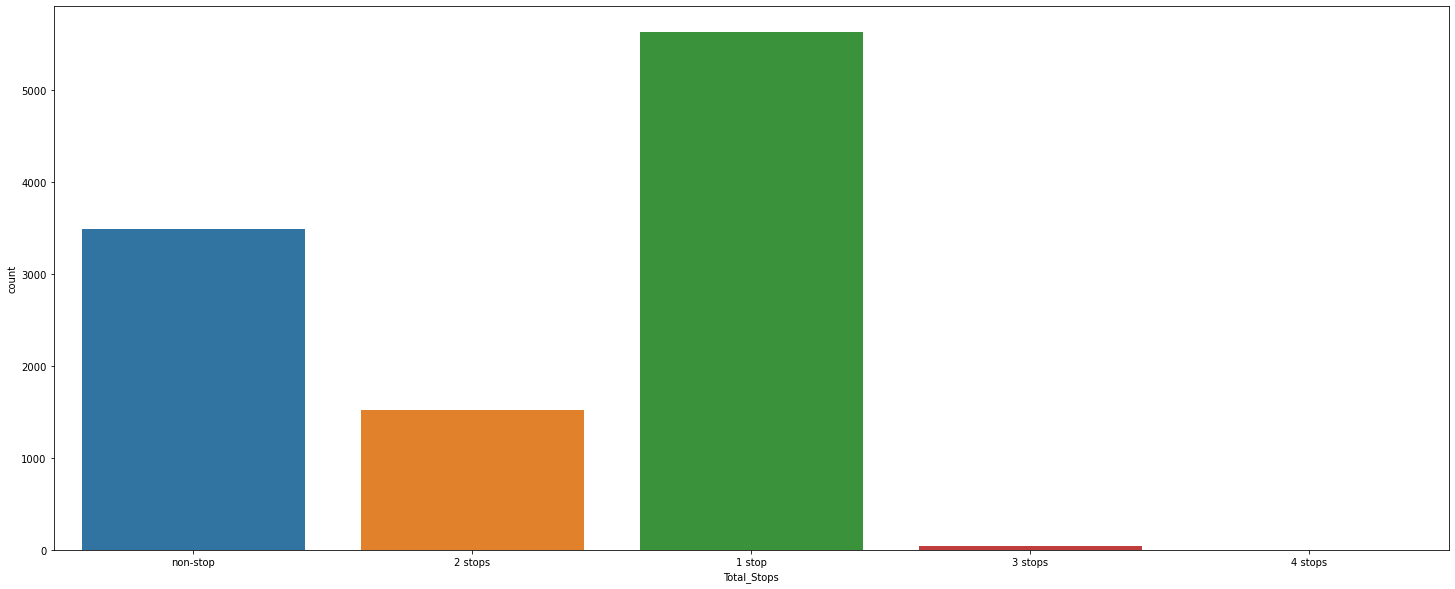

In [1492]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Total_Stops", data=data_train)
print(data_train["Total_Stops"].value_counts())

# 
5625 flights have 1 stop, 3491 flights fly non-stop, 1520 flights have 2 stops, 45 flights have 3 stops and 1 flight has 4 stops       

In [1493]:
#Replace the values of meaningful obvious values
data_train["Total_Stops"]=data_train["Total_Stops"].replace("non-stop",0)
data_train["Total_Stops"]=data_train["Total_Stops"].replace("1 stop",1)
data_train["Total_Stops"]=data_train["Total_Stops"].replace("2 stops",2)
data_train["Total_Stops"]=data_train["Total_Stops"].replace("3 stops",3)
data_train["Total_Stops"]=data_train["Total_Stops"].replace("4 stops",4)

# 
The data is encoded as follows-

- 0 - non-stop
- 1 - 1 stop 
- 2 - 2 stops
- 3 - 3 stops
- 4 - 4 stops

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


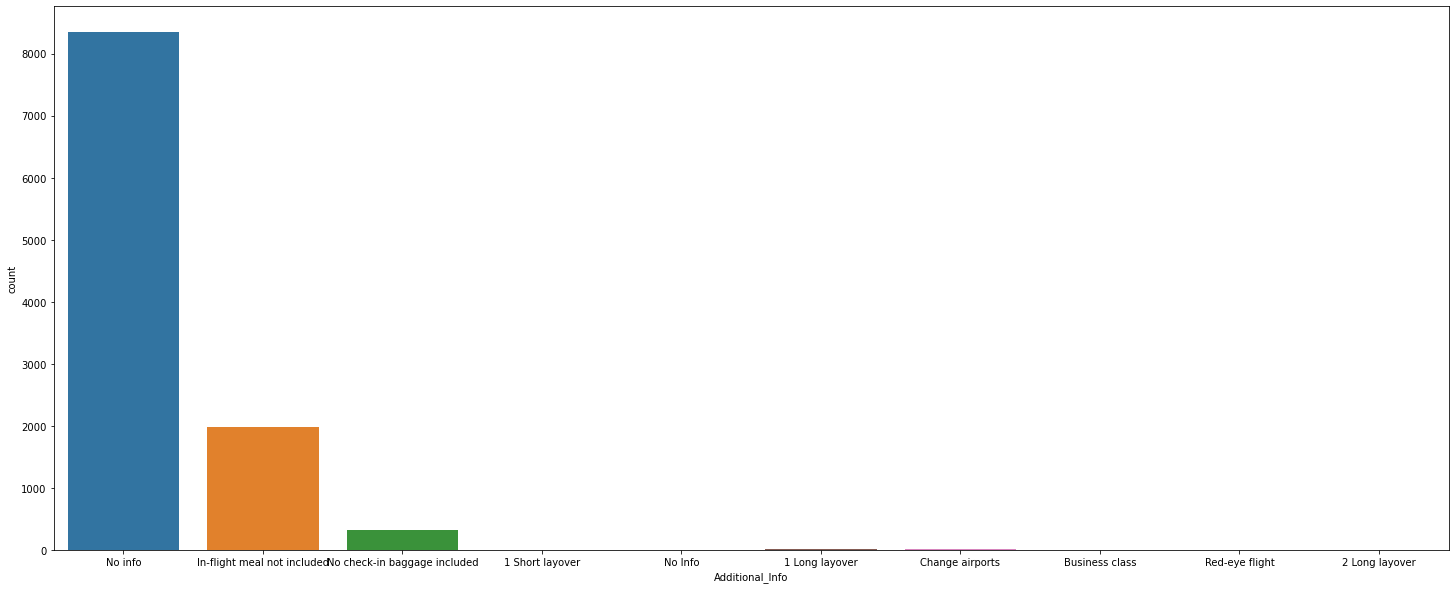

In [1494]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Additional_Info", data=data_train)
print(data_train["Additional_Info"].value_counts())

# 
8344 (+3) have no additional info, 1982 have In-flight meal not included, 320 have No check-in baggage included, 19 have 1 Long layover, 7 have Change airports,  4 have Business class,  1 has 1 Short layover, 1 has Red-eye flight, 1 has 2 Long layover

In [1495]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Additional_Info"])
data_train["Additional_Info"]=df

# 
The data is encoded as follows-

- 0 - 1 Long layover 
- 1 - 1 Short layover 
- 2 - 2 Long layover
- 3 - Business class
- 4 - Change airports
- 5 - In-flight meal not included
- 6 - No Info
- 7 - No check-in baggage included
- 8 - No info 
- 9 - Red-eye flight

In [1496]:
#Replace the values of reduntant No info to one category (i.e., 8)
data_train["Additional_Info"]=data_train["Additional_Info"].replace(6,8)

In [1497]:
data_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,3,0,12,18.0,2220,110,170,0,8,3897,24,3
1,1,3,10,84.0,550,1315,445,2,8,7662,1,5
2,4,2,11,118.0,925,425,1140,2,8,13882,9,6
3,3,3,10,91.0,1805,2330,325,1,8,6218,12,5
4,3,0,12,29.0,1650,2135,285,1,8,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,10,64.0,1955,2225,150,0,8,4107,9,4
10679,1,3,10,64.0,2045,2320,155,0,8,4145,27,4
10680,4,0,12,18.0,820,1120,180,0,8,7229,27,4
10681,10,0,12,18.0,1130,1410,160,0,8,12648,1,3


In [1498]:
#Statistical Analysis
data_train.describe()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,11.174406,74.820165,1273.510579,1359.609156,643.020502,0.824190,7.393559,9087.214567,13.509081,4.708575
std,2.352090,1.177276,1.012980,36.729039,574.723912,683.578257,507.830133,0.675229,1.214072,4611.548810,8.479363,1.164408
min,0.000000,0.000000,10.000000,0.000000,20.000000,5.000000,5.000000,0.000000,0.000000,1759.000000,1.000000,3.000000
25%,3.000000,2.000000,10.000000,48.000000,800.000000,845.000000,170.000000,0.000000,8.000000,5277.000000,6.000000,3.000000
50%,4.000000,2.000000,11.000000,73.000000,1150.000000,1405.000000,520.000000,1.000000,8.000000,8372.000000,12.000000,5.000000
75%,4.000000,3.000000,12.000000,104.000000,1805.000000,1915.000000,930.000000,1.000000,8.000000,12373.000000,21.000000,6.000000
max,11.000000,4.000000,14.000000,127.000000,2355.000000,2355.000000,2860.000000,4.000000,9.000000,79512.000000,27.000000,6.000000


In [1499]:
#As the duration of any flight is not usually 5 minutes, the data needs to be checked

data_train.loc[data_train["Duration"]==5]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
6474,1,4,13,47.0,1650,1655,5,2,8,17327,6,3


In [1500]:
#The arrival time is probably for the next day

data_train["Duration"]=data_train["Duration"].replace(5,1445)

In [1501]:
#Statistical Analysis
data_train.describe()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,11.174406,74.820165,1273.510579,1359.609156,643.155308,0.824190,7.393559,9087.214567,13.509081,4.708575
std,2.352090,1.177276,1.012980,36.729039,574.723912,683.578257,507.851879,0.675229,1.214072,4611.548810,8.479363,1.164408
min,0.000000,0.000000,10.000000,0.000000,20.000000,5.000000,75.000000,0.000000,0.000000,1759.000000,1.000000,3.000000
25%,3.000000,2.000000,10.000000,48.000000,800.000000,845.000000,170.000000,0.000000,8.000000,5277.000000,6.000000,3.000000
50%,4.000000,2.000000,11.000000,73.000000,1150.000000,1405.000000,520.000000,1.000000,8.000000,8372.000000,12.000000,5.000000
75%,4.000000,3.000000,12.000000,104.000000,1805.000000,1915.000000,930.000000,1.000000,8.000000,12373.000000,21.000000,6.000000
max,11.000000,4.000000,14.000000,127.000000,2355.000000,2355.000000,2860.000000,4.000000,9.000000,79512.000000,27.000000,6.000000


# Checking Correlation

In [1502]:
#Let's print the correlation coefficient for the Prediction with Price

corr_matrix=data_train.corr()
corr_matrix["Price"].sort_values(ascending=True)

Destination       -0.262164
Date              -0.153774
Month             -0.103643
Additional_Info   -0.065577
Airline           -0.039565
Dep_Time           0.006002
Source             0.015999
Arrival_Time       0.022247
Route              0.164149
Duration           0.506932
Total_Stops        0.603897
Price              1.000000
Name: Price, dtype: float64

# Observation-
- Date, Month, Destination, Additional_Info and Airline are negatively correlated to the label Price
- Dep_Time, Source, Arrival_Time, Route, Duration  and Total_Stops are positively correlated to the label Price
- Date are 15% negatively correlated to the label Price showing a moderately weak bond
- Airline is 3% negatively correlated with Price showing an extremely weak bond
- Dep_Time is 0.6% positively correlated with Price showing an extremely weak bond
- Total_Stops is 60% positively correlated with Price showing a strong bond


As Route is weakly corelated to Price, it is advised to drop it out, as it is producing a large number of categories, which might not be clean for the model

In [1503]:
data_train=data_train.drop(columns=["Route"])

# Checking for outliers

In [1504]:
data_train.shape

(10682, 11)

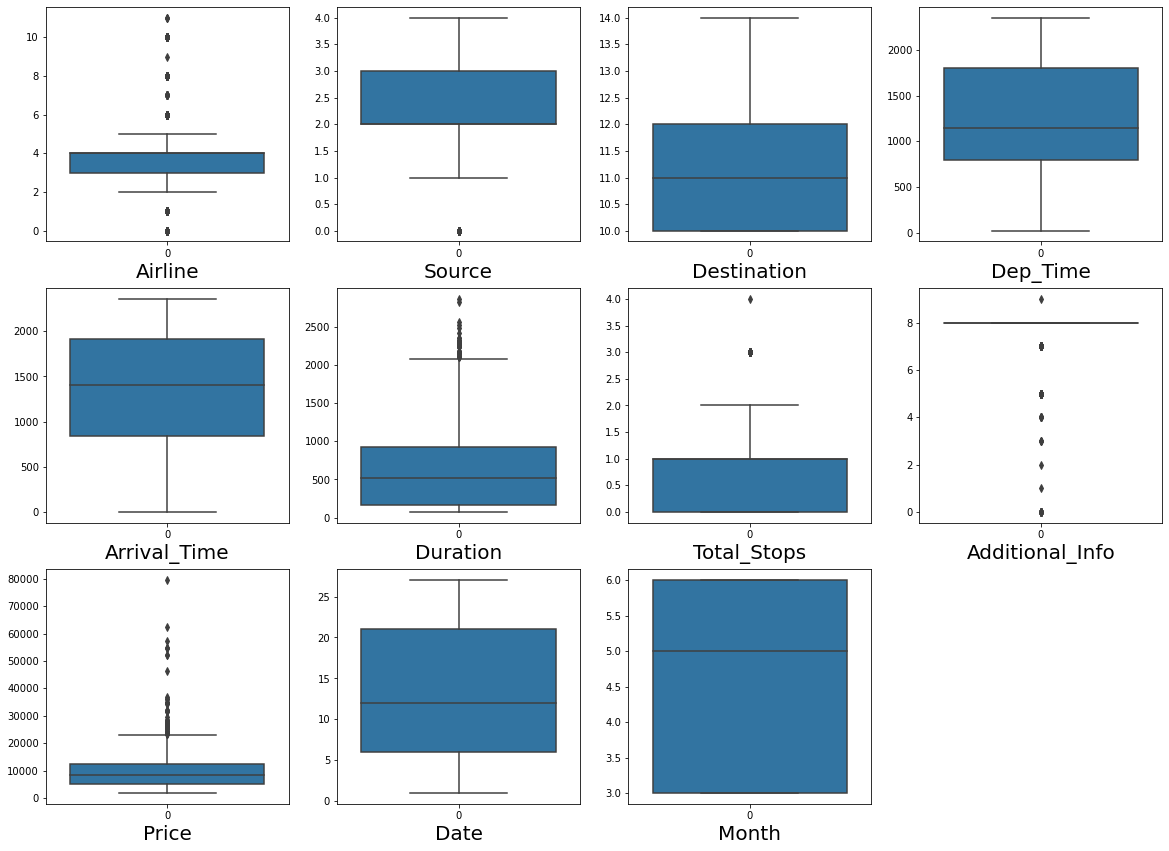

In [1505]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data_train:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(data=data_train[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features containing outliers-

- Airline
- Source
- Duration
- Total Stops
- Additional Info
- Price

However as all outliers are belonging to categorical data, we tend to ignore it

# Divide Data Set into x_train and y_train

In [1506]:
y_train=data_train['Price']
x_train=data_train.drop(columns=['Price'])

# Checking for skewness

In [1507]:
x_train.skew().sort_values(ascending=False)

Duration           0.861059
Destination        0.846631
Airline            0.731057
Total_Stops        0.317109
Dep_Time           0.120256
Date               0.118174
Arrival_Time      -0.371465
Month             -0.387409
Source            -0.424023
Additional_Info   -1.781418
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

- Duration
- Destination
- Airline
- Additional_Info

# Transforming Data to remove skewness

In [1508]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x_train)

In [1509]:
x_train=x_n

# Reading the test data (x_test)

In [1510]:
#Read csv file and convert into Dataframe
data_test=pd.read_excel(r'D:\DataTrained\Flight_Ticket_Participant_Datasets\Test_set.xlsx')
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Observation-

The features in the above data set are-

- Airline     

- Date_of_Journey    

- Source 

- Destination 

- Route 

- Dep Time

- Arrival_Time

- Duration

- Total stops

- Additional info


In [1511]:
#shape of file
data_test.shape

(2671, 10)

In [1512]:
# Checking for data types of the columns
data_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [1513]:
# Checking for null values
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [1514]:
# Checking for null values in object datatype columns

for column in data_test:
    data_test[column]=data_test[column].replace(" ",np.nan)

In [1515]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
dtype: int64

# Visualization of the Data and Encoding object data

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


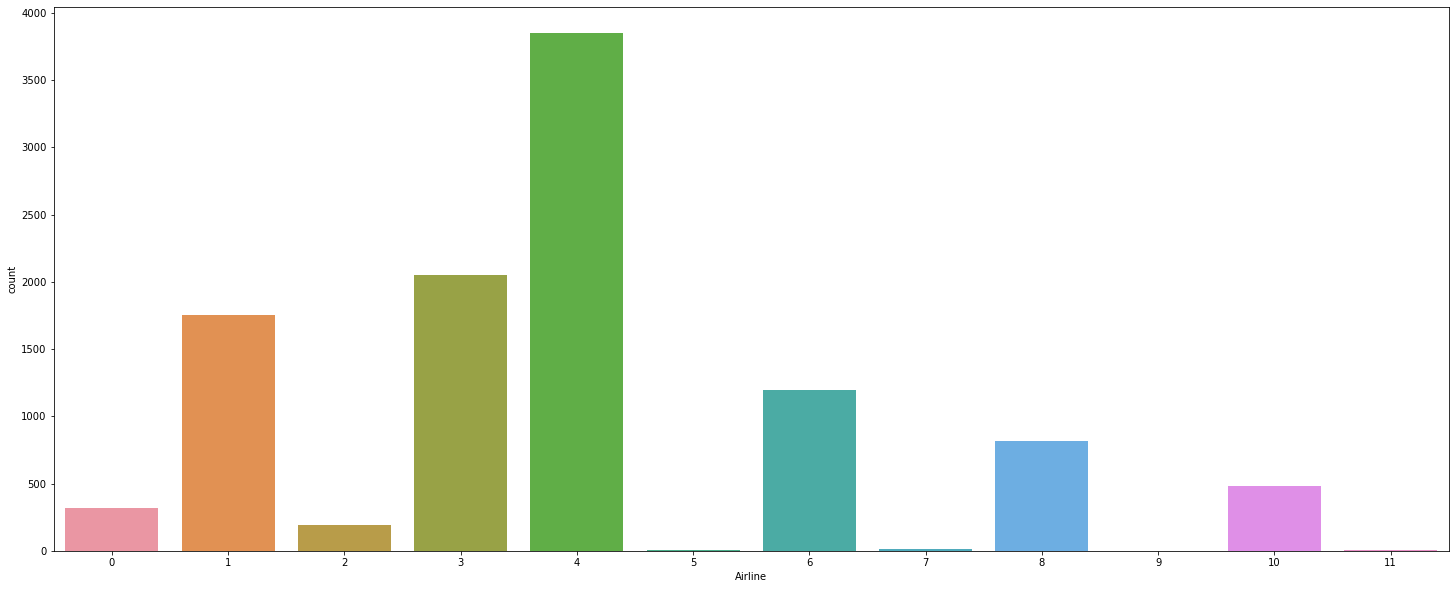

In [1516]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Airline", data=data_train)
print(data_test["Airline"].value_counts())

# 
897 are Jet Airways flights, 511 are Indigo flights, 440 are Air India flights, 347 are Multple carriers, 208 are spice jet flights, 129 are vistara flights, 86 are Ais Asia flights, 46 are GoAir flights, 3 are Multiple carriers Premium economy, 2 are Jet Airways Business, 2 are Vistara Premium Economy 

In [1517]:
#To maintain the encoding as with the train data, we replace it with the codes encoded in the training set

data_test["Airline"]=data_test["Airline"].replace("Air Asia",0)
data_test["Airline"]=data_test["Airline"].replace("Air India",1)
data_test["Airline"]=data_test["Airline"].replace("GoAir",2)
data_test["Airline"]=data_test["Airline"].replace("IndiGo",3)
data_test["Airline"]=data_test["Airline"].replace("Jet Airways",4)
data_test["Airline"]=data_test["Airline"].replace("Jet Airways Business",5)
data_test["Airline"]=data_test["Airline"].replace("Multiple carriers",6)
data_test["Airline"]=data_test["Airline"].replace("Multiple carriers Premium economy",7)
data_test["Airline"]=data_test["Airline"].replace("SpiceJet",8)
data_test["Airline"]=data_test["Airline"].replace("Vistara",10)
data_test["Airline"]=data_test["Airline"].replace("Vistara Premium economy",11)

# 
The data is encoded as follows-

- 0 - Air Asia
- 1 - Air India
- 2 - GoAir
- 3 - IndiGo
- 4 - Jet Airways 
- 5 - Jet Airways Business
- 6 - Multiple carriers
- 7 - Multiple carriers Premium economy
- 8 - SpiceJet
- 10- Vistara 
- 11- Vistara Premium economy

In [1518]:
data_test['Date_of_Journey']=pd.to_datetime(data_test['Date_of_Journey'], dayfirst=True)

In [1519]:
#Storing date and month in separate column
#As the year is 2019, it need not be stored
data_test['Date']=data_test['Date_of_Journey'].dt.day
data_test['Month']=data_test['Date_of_Journey'].dt.month

In [1520]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,4,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,3,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,4,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,6,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,0,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,3,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,4,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,1,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


In [1521]:
#As the date of journey is stored in date and month columns, date of journey is deleted
data_test=data_test.drop(columns=["Date_of_Journey"])

<AxesSubplot:ylabel='Frequency'>

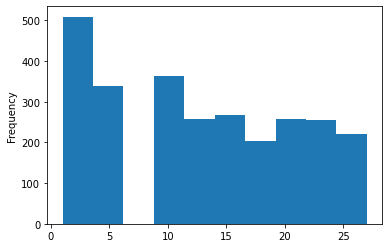

In [1522]:
data_test.Date.plot(kind='hist')

# 
The maximum flights are operated in the 1st week of the month

6    872
5    863
3    688
4    248
Name: Month, dtype: int64


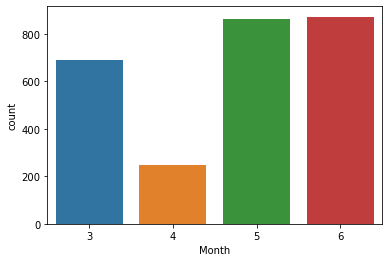

In [1523]:
ax=sns.countplot(x="Month", data=data_test)
print(data_test["Month"].value_counts())

# 
The maximum flights are operated in the month of May and June

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


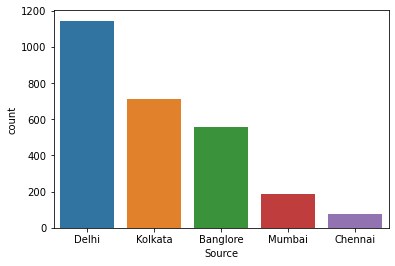

In [1524]:
ax=sns.countplot(x="Source", data=data_test)
print(data_test["Source"].value_counts())


1145 flights depart from Delhi, 710 flights depart from Kolkata, 555 flights depart from Banglore, 186 flights depart from Mumbai, 75 flights depart from Chennai
   

In [1525]:
#To maintain the encoding as with the train data, we replace it with the codes encoded in the training set

data_test["Source"]=data_test["Source"].replace("Banglore",0)
data_test["Source"]=data_test["Source"].replace("Chennai",1)
data_test["Source"]=data_test["Source"].replace("Delhi",2)
data_test["Source"]=data_test["Source"].replace("Kolkata",3)
data_test["Source"]=data_test["Source"].replace("Mumbai",4)

# 
The data is encoded as follows-

- 0 - Banglore
- 1 - Chennai
- 2 - Delhi
- 3 - Kolkata
- 4 - Mumbai

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


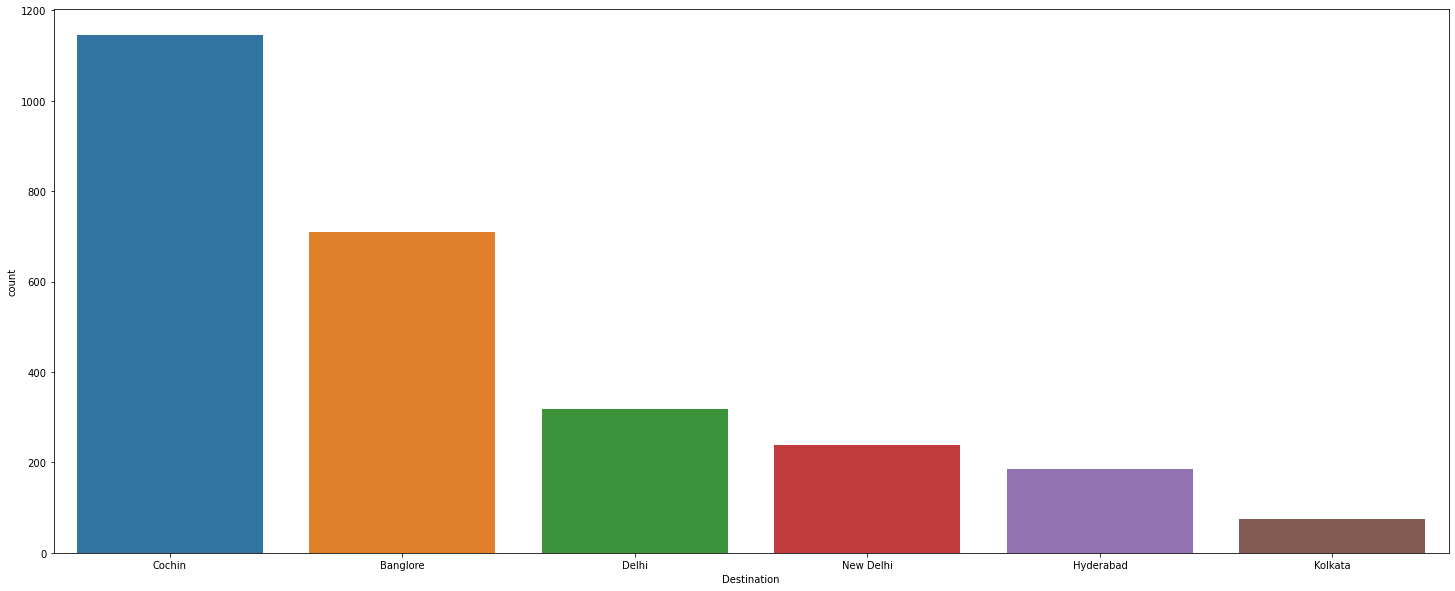

In [1526]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Destination", data=data_test)
print(data_test["Destination"].value_counts())

# 
1145 flights arrive at Cochin, 710 flights arrive at Banglore, 317 flights arrive at Delhi, 238 flights arrive at New Delhi, 186 flights arrive at Hyderabad, 75 flights arrive at Kolkata

As Delhi and New Delhi are the same location, theri data will be combined (317+238), 555 flights arrive at Delhi

In [1527]:
#To maintain the encoding as with the train data, we replace it with the codes encoded in the training set

data_test["Destination"]=data_test["Destination"].replace("Banglore",10)
data_test["Destination"]=data_test["Destination"].replace("Cochin",11)
data_test["Destination"]=data_test["Destination"].replace("Delhi",12)
data_test["Destination"]=data_test["Destination"].replace("Hyderabad",13)
data_test["Destination"]=data_test["Destination"].replace("Kolkata",14)
data_test["Destination"]=data_test["Destination"].replace("New Delhi",12)

# 
The data is now encoded as follows-

- 10 - Banglore
- 11 - Cochin
- 12 - Delhi
- 13 - Hyderabad
- 14 - Kolkata

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64


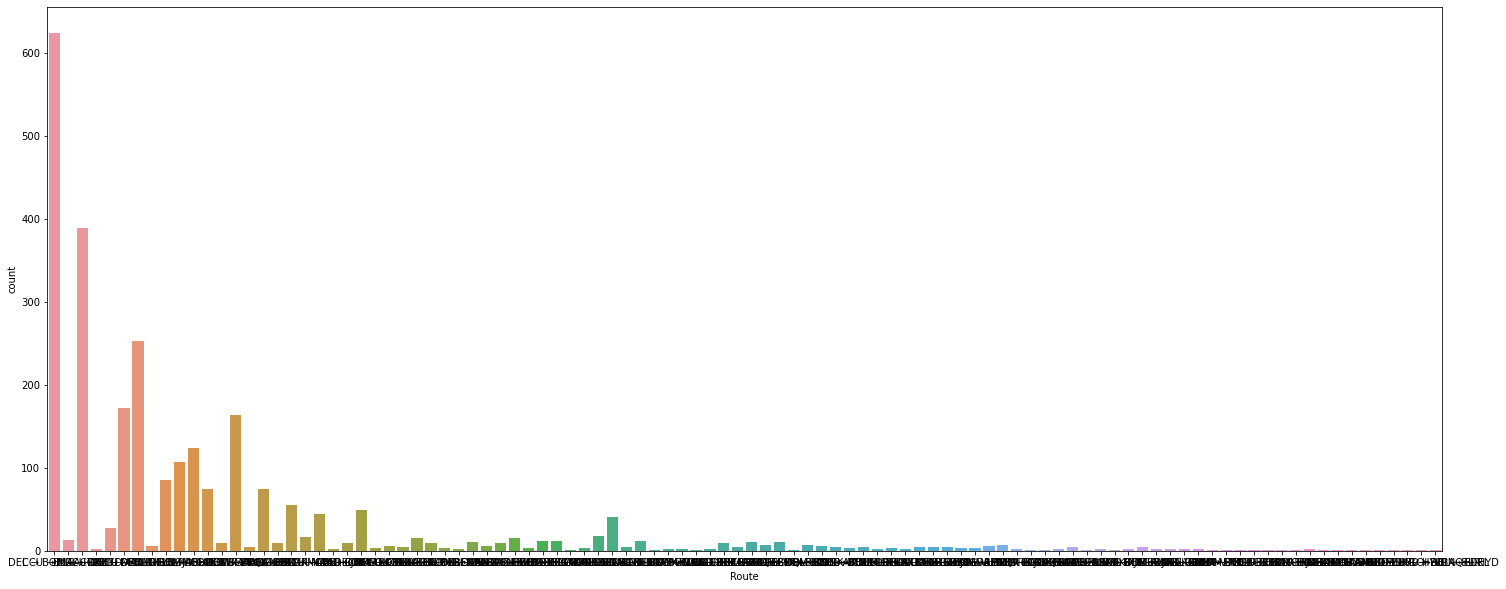

In [1528]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Route", data=data_test)
print(data_test["Route"].value_counts())

# 
Maximum flights pass through Mumbai (BOM)

In [1529]:
#Encoding the features using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

data_test["Route"]=enc.fit_transform(data_test["Route"].values.reshape(-1,1))

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
22:30     1
16:35     1
15:35     1
06:15     1
23:00     1
Name: Dep_Time, Length: 199, dtype: int64


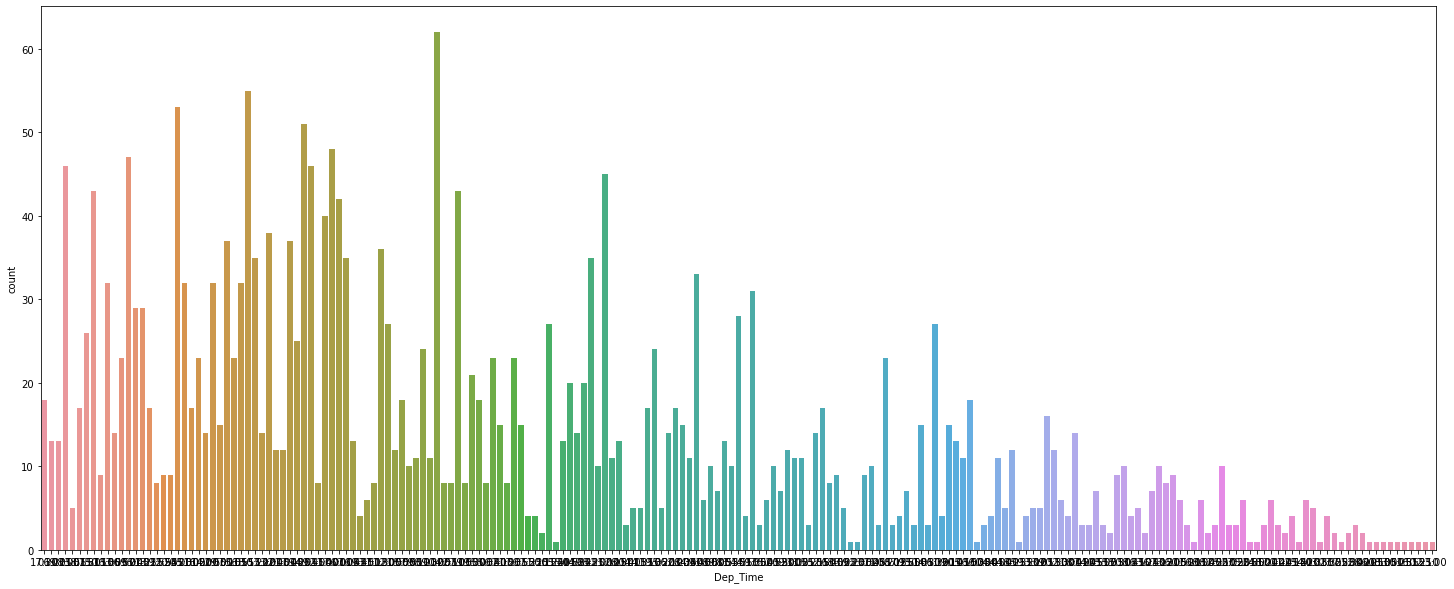

In [1530]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Dep_Time", data=data_test)
print(data_test["Dep_Time"].value_counts())

# 
Majority of the flights depart between 17:00 to 20:00

In [1531]:
#Converting time to continous number
d=data_test["Dep_Time"]

In [1532]:
dd=[]
for i in d:
    dd.append(i[0:2]+i[3:5])

In [1533]:
data_test["Dep_Time"]=dd

In [1534]:
data_test["Dep_Time"]=data_test["Dep_Time"].astype(int)

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
19:10 13 May      1
10:00 02 Apr      1
19:10 02 Apr      1
01:20 04 Mar      1
20:25 07 Jun      1
Name: Arrival_Time, Length: 704, dtype: int64


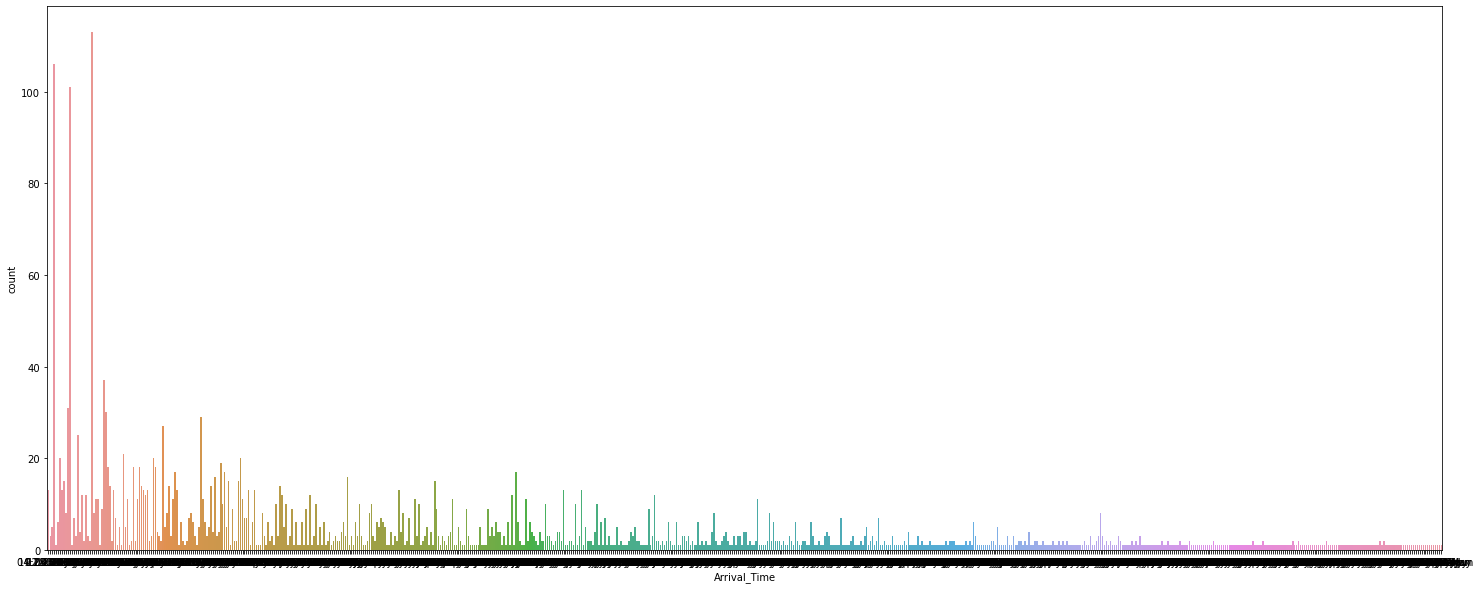

In [1535]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Arrival_Time", data=data_test)
print(data_test["Arrival_Time"].value_counts())

# 
Majority of the flights arrive at night between 19:00 and 21:00

In [1536]:
#Converting time to continous number
da=data_test["Arrival_Time"]

In [1537]:
d=[]
for i in da:
    d.append(i[0:2]+i[3:5])

In [1538]:
data_test["Arrival_Time"]=d

In [1539]:
data_test["Arrival_Time"]=data_test["Arrival_Time"].astype(int)

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64


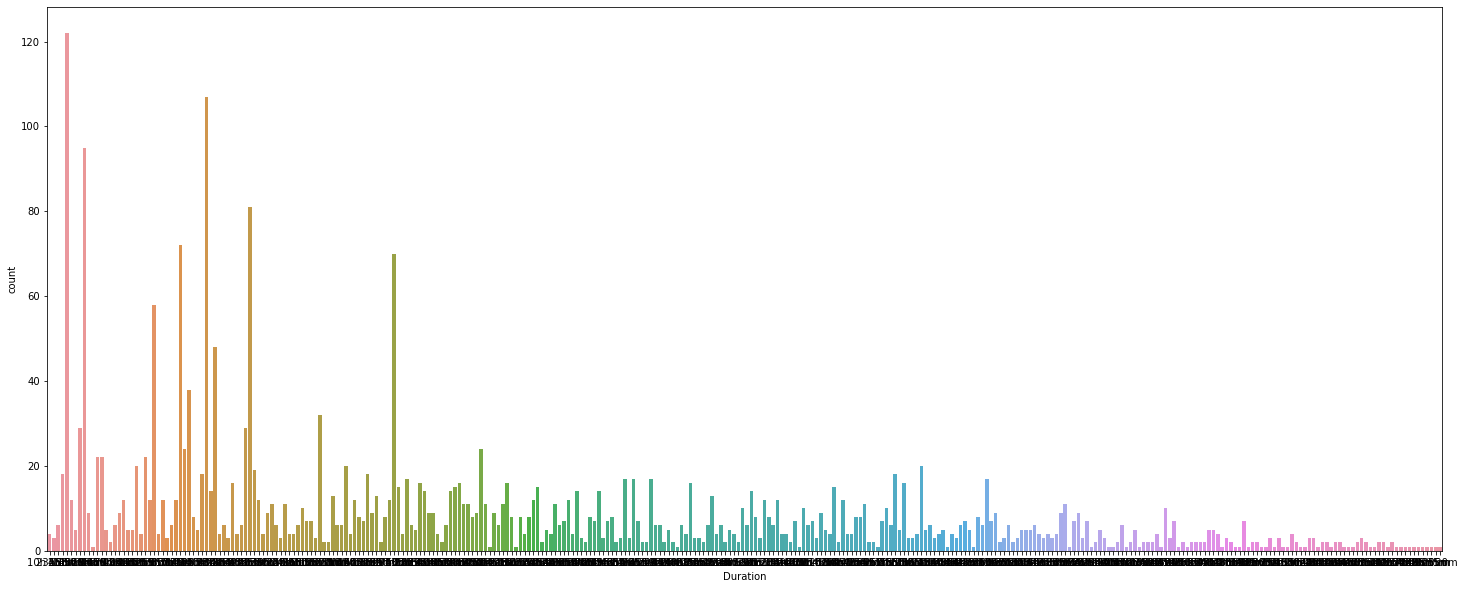

In [1540]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Duration", data=data_test)
print(data_test["Duration"].value_counts())

# 
The flight duration of majority flights are of 1-3 hours

In [1541]:
#Converting time to continous number
dur=data_test["Duration"]

In [1542]:
dt_h=[]
dt_m=[]
for i in dur:
    b=""
    c=""
    x=0
    y=0
    for a in range(0,len(i)):
        if i[a]=='h':
            x=a
            b=i[0:x]
            dt_h.append(b)
    for a in range(0,len(i)):       
        if i[a]=='m':
            y=a
            if x>0:
                c=i[x+2:y] 
            else:
                c=i[0:y]
            dt_m.append(c)
    if b=="":
        dt_h.append('0')
    if c=="":
        dt_m.append('0')   

In [1543]:
#converting duration into minutes
dh=[]
a=0
for i in dt_h:
    l=int(i)
    if dt_m[a]=='':
        j=0
    else:
        j=int(dt_m[a])
    k=(l*60)+j
    dh.append(k)
    a=a+1

In [1544]:
data_test["Duration"]=dh

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


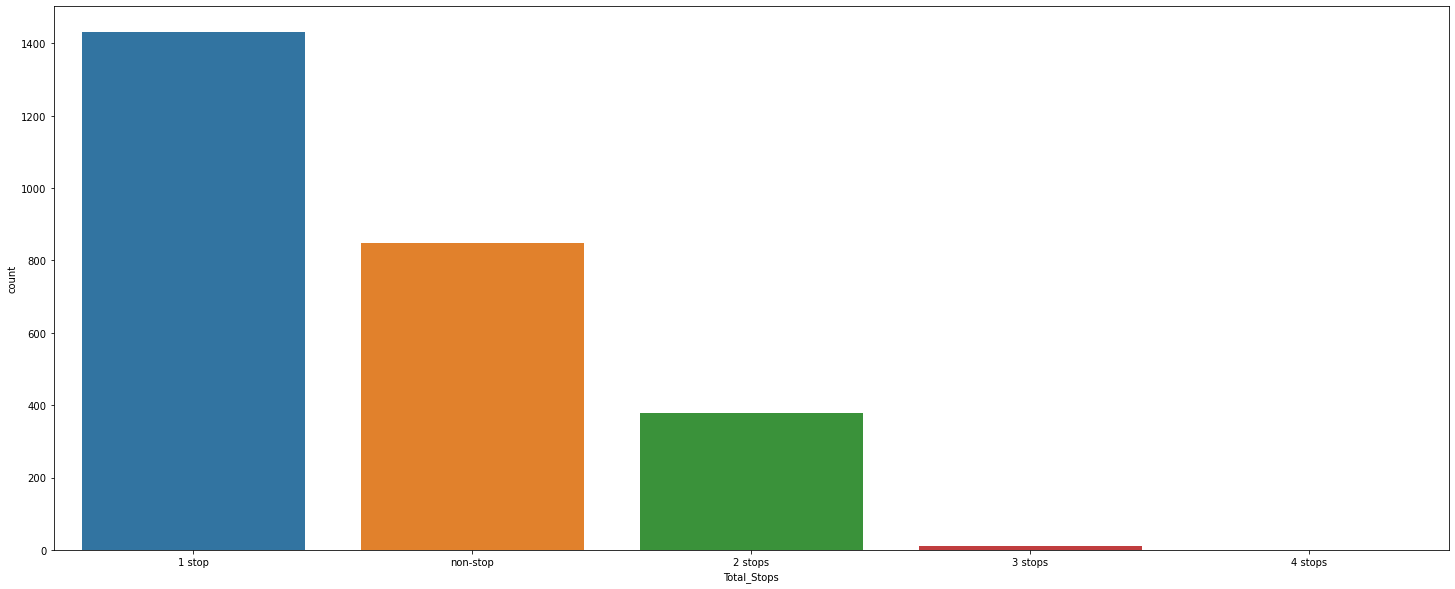

In [1545]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Total_Stops", data=data_test)
print(data_test["Total_Stops"].value_counts())

# 
1431 flights have 1 stop, 849 fly non-stop, 379 flights have 2 stops, 11 flights have 3 stops, 1 flight have 4 stops
  

In [1546]:
#Replace the values of meaningful obvious values
data_test["Total_Stops"]=data_test["Total_Stops"].replace("non-stop",0)
data_test["Total_Stops"]=data_test["Total_Stops"].replace("1 stop",1)
data_test["Total_Stops"]=data_test["Total_Stops"].replace("2 stops",2)
data_test["Total_Stops"]=data_test["Total_Stops"].replace("3 stops",3)
data_test["Total_Stops"]=data_test["Total_Stops"].replace("4 stops",4)

# 
The data is encoded as follows-

- 0 - non-stop
- 1 - 1 stop
- 2 - 2 stops
- 3 - 3 stops
- 4 - 4 stops

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64


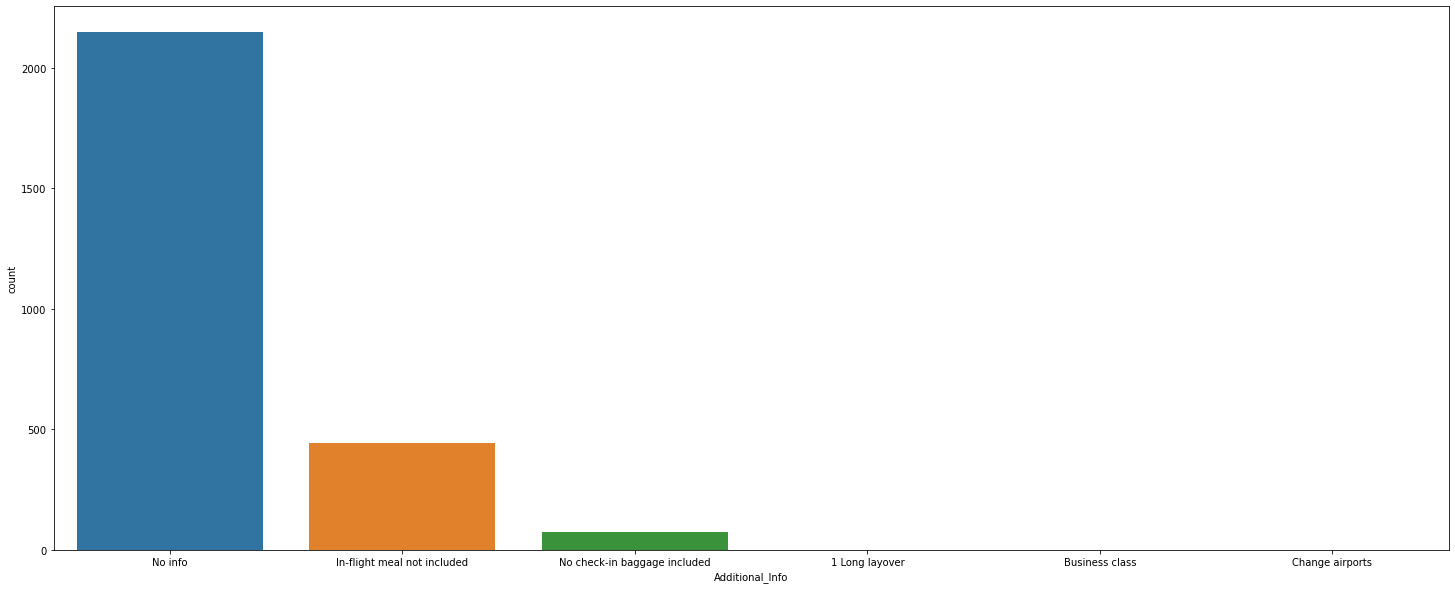

In [1547]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Additional_Info", data=data_test)
print(data_test["Additional_Info"].value_counts())

# 
2148 have no additional info, 444 have In-flight meal not included, 76 have No check-in baggage included, 1 has 1 Long layover, 1 has Business class,  1 has Change airports     

In [1548]:
#To maintain the encoding as with the train data, we replace it with the codes encoded in the training set

data_test["Additional_Info"]=data_test["Additional_Info"].replace("1 Long layover",0)
data_test["Additional_Info"]=data_test["Additional_Info"].replace("Business class",3)
data_test["Additional_Info"]=data_test["Additional_Info"].replace("Change airports",4)
data_test["Additional_Info"]=data_test["Additional_Info"].replace("In-flight meal not included",5)
data_test["Additional_Info"]=data_test["Additional_Info"].replace("No info",8)
data_test["Additional_Info"]=data_test["Additional_Info"].replace("No check-in baggage included",7)

# 
The data is encoded as follows-

- 0 - 1 Long layover
- 3 - Business class
- 4 - Change airports
- 5 - In-flight meal not included
- 7 - No check-in baggage included
- 8 - No info

In [1549]:
data_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,4,2,11,76.0,1730,425,655,1,8,6,6
1,3,3,10,65.0,620,1020,240,1,8,12,5
2,4,2,11,76.0,1915,1900,1425,1,5,21,5
3,6,2,11,76.0,800,2100,780,1,8,21,5
4,0,0,12,16.0,2355,245,170,0,8,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,10,51.0,2030,2025,1435,1,8,6,6
2667,3,3,10,43.0,1420,1655,155,0,8,27,3
2668,4,2,11,76.0,2150,425,395,1,8,6,3
2669,1,2,11,76.0,400,1915,915,1,8,6,3


In [1550]:
#Statistical Analysis
data_test.describe()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000
mean,4.021715,1.961438,11.165481,54.356421,1285.243355,1383.075627,639.74167,0.833396,7.466492,12.915762,4.718458
std,2.410708,1.184328,0.988863,27.128993,568.328564,701.951322,502.18693,0.672315,1.131230,8.260824,1.170851
min,0.000000,0.000000,10.000000,0.000000,25.000000,5.000000,5.00000,0.000000,0.000000,1.000000,3.000000
25%,3.000000,2.000000,10.000000,33.000000,800.000000,845.000000,175.00000,0.000000,8.000000,6.000000,3.000000
50%,4.000000,2.000000,11.000000,51.000000,1200.000000,1525.000000,520.00000,1.000000,8.000000,12.000000,5.000000
75%,6.000000,3.000000,12.000000,76.000000,1815.000000,1945.000000,915.00000,1.000000,8.000000,21.000000,6.000000
max,11.000000,4.000000,14.000000,99.000000,2355.000000,2355.000000,2440.00000,4.000000,8.000000,27.000000,6.000000


In [1551]:
#As the duration of any flight is not usually 5 minutes, the data needs to be checked

data_test.loc[data_test["Duration"]==5]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
2660,1,4,13,32.0,1650,1655,5,2,8,12,3


In [1552]:
#The arrival time is probably for the next day

data_test["Duration"]=data_test["Duration"].replace(5,1445)

In [1553]:
#Statistical Analysis
data_test.describe()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,4.021715,1.961438,11.165481,54.356421,1285.243355,1383.075627,640.280794,0.833396,7.466492,12.915762,4.718458
std,2.410708,1.184328,0.988863,27.128993,568.328564,701.951322,502.278195,0.672315,1.131230,8.260824,1.170851
min,0.000000,0.000000,10.000000,0.000000,25.000000,5.000000,75.000000,0.000000,0.000000,1.000000,3.000000
25%,3.000000,2.000000,10.000000,33.000000,800.000000,845.000000,175.000000,0.000000,8.000000,6.000000,3.000000
50%,4.000000,2.000000,11.000000,51.000000,1200.000000,1525.000000,520.000000,1.000000,8.000000,12.000000,5.000000
75%,6.000000,3.000000,12.000000,76.000000,1815.000000,1945.000000,915.000000,1.000000,8.000000,21.000000,6.000000
max,11.000000,4.000000,14.000000,99.000000,2355.000000,2355.000000,2440.000000,4.000000,8.000000,27.000000,6.000000


In [1554]:
#droping the column route as it produces large number of categories

data_test=data_test.drop(columns=["Route"])

# Checking for outliers

In [1555]:
data_test.shape

(2671, 10)

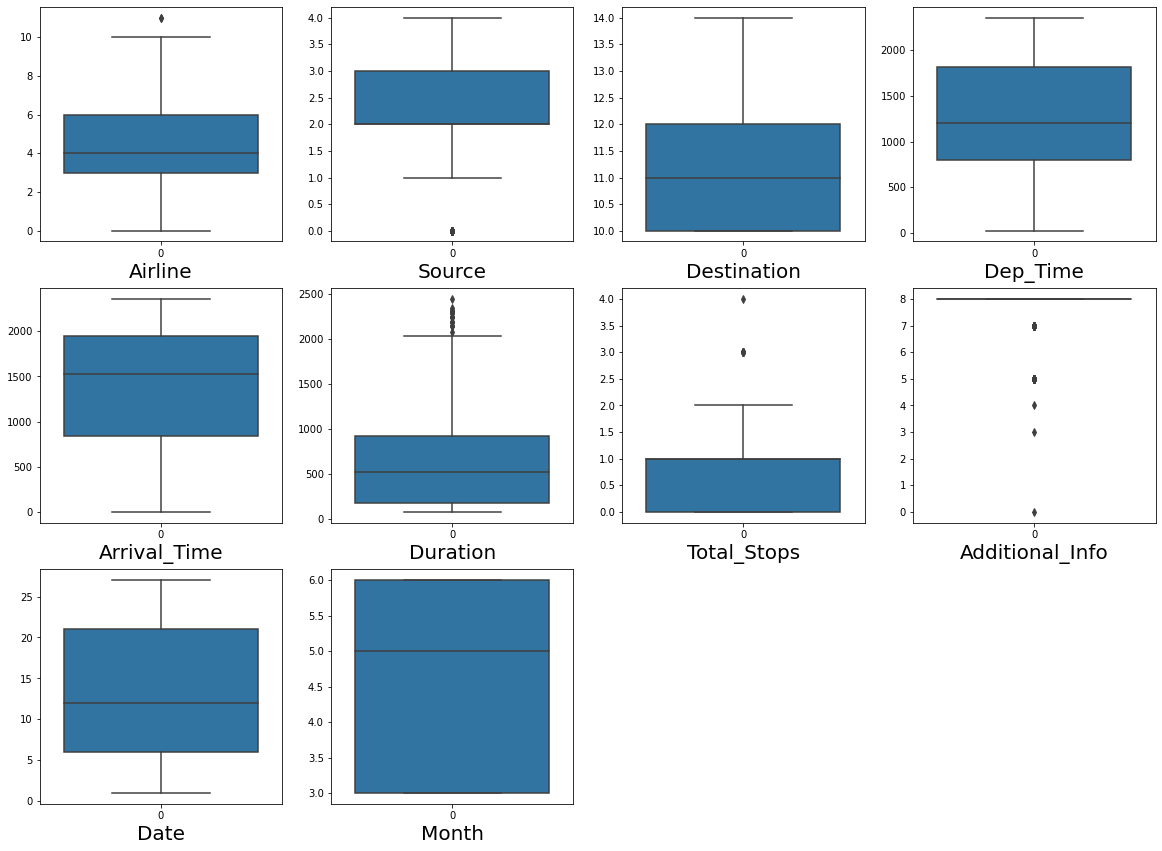

In [1556]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data_test:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(data=data_test[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()


The features containing outliers-

- Airline
- Source
- Duration
- Total Stops
- Additional Info

However as all outliers are belonging to categorical data, we tend to ignore it

# Checking for skewness

In [1557]:
data_test.skew().sort_values(ascending=False)

Duration           0.894694
Destination        0.794526
Airline            0.680800
Total_Stops        0.321364
Date               0.199540
Dep_Time           0.103583
Month             -0.403700
Source            -0.424997
Arrival_Time      -0.443937
Additional_Info   -1.784149
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

- Duration
- Destination
- Airline
- Additional_Info

# Transforming Data to remove skewness

In [1558]:
from sklearn.preprocessing import power_transform
x_t=power_transform(data_test)

In [1559]:
x_test=x_t

# Reading the Sample Submission (y_test)

In [1560]:
#Read csv file and convert into Dataframe
y_test=pd.read_excel(r'D:\DataTrained\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx')
y_test

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [1561]:
y_test=y_test["Price"]

# 
Checking for shape of train and test data

In [1562]:
x_train.shape

(10682, 10)

In [1563]:
y_train.shape

(10682,)

In [1564]:
x_test.shape

(2671, 10)

In [1565]:
y_test.shape

(2671,)

# 
The shape of train and test data are fine, but the format of ytest needs to be modified

# Using Logistic Regression Model

In [1566]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

In [1567]:
lr.fit(x_train, y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

-5.253902912167506


# Cross Validation of the model

In [1568]:
pred_train=lr.predict(x_train)
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_train,y_train,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  0.4668938344990277  and accuracy score for the training is  0.46830283691853203  and the accuracy score for the testing is  -5.253902912167506


At cross fold  3  the cv score is  0.4674680816467838  and accuracy score for the training is  0.46830283691853203  and the accuracy score for the testing is  -5.253902912167506


At cross fold  4  the cv score is  0.4669796590556553  and accuracy score for the training is  0.46830283691853203  and the accuracy score for the testing is  -5.253902912167506


At cross fold  5  the cv score is  0.4674437064423878  and accuracy score for the training is  0.46830283691853203  and the accuracy score for the testing is  -5.253902912167506


At cross fold  6  the cv score is  0.4695295506571971  and accuracy score for the training is  0.46830283691853203  and the accuracy score for the testing is  -5.253902912167506


At cross fold  7  the cv score is  0.4695464682399981  and accuracy score for the training is  0.468

# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=4 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

<function matplotlib.pyplot.show(close=None, block=None)>

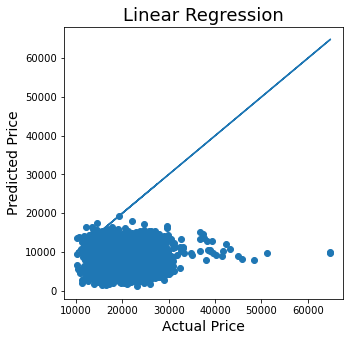

In [1569]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show

# Regularization

In [1570]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [1571]:
ls=Lasso(alpha=0.1, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train, y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

-5.253856166929343

In [1572]:
cv_score=cross_val_score(ls,x_train,y_train,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.46697988482998504

# Using Random Forest Regressor Model

In [1573]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [1574]:
rf=RandomForestRegressor(criterion="mse", max_features="sqrt")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,x_train,y_train,cv=4)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  -494.34307110643215
Cross Val Score: 87.84462825896708


# Using Ada Boost Regressor Model

In [1575]:
from sklearn.ensemble import AdaBoostRegressor
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 0.01, 'n_estimators': 65}


In [1576]:
ad=AdaBoostRegressor(n_estimators=65, learning_rate=0.01)
ad.fit(x_train, y_train)
ad.score(x_train, y_train)
pred_decision=ad.predict(x_test)

ads=r2_score(y_test,pred_decision)
print('R2 Score: ', ads*100)

adscore=cross_val_score(ad,x_train,y_train,cv=4)
adc=adscore.mean()
print("Cross Val Score:", adc*100)

R2 Score:  -640.5863304574456
Cross Val Score: 50.70104267710926


# Saving the Random Forest Regressor Model

In [1577]:
filename='Flight Price Prediction.pkl'
pickle.dump(rf, open(filename,'wb'))